In [1]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WeakLearners import WongNeuralNetCIFAR10
import matplotlib.pyplot as plt

In [2]:
from Boosting import Ensemble, runBoosting
from AdversarialAttacks import attack_fgsm, attack_pgd

In [3]:
import utils

In [4]:
cuda = torch.device('cuda:0')

In [5]:
%load_ext autoreload
%autoreload 2

## CIFAR10 Boosting (Adversarial)

In [6]:
maxSamples_vals = [200, 1000, 4000, 10000, 50000, 100000]
# maxSamples_vals = [200]

In [7]:
num_wl = 2 # maybe around 100? #later: maybe change this to an array?
num_epochs = 1

In [8]:
ensembles = []
epsilons = [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
attack eps ens [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]
----------------------------------------------------------------------------------------------------
Training weak learner 0
adv_train: True
Epoch 0


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/cifar.py:118: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img, target = self.data[index], self.targets[index]
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:893: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Training accuracy of weak learner:  0.10088
Alpha:  0.0009777780893792181
Progress: 0,  val accuracy: 0.1250
----------------------------------------------------------------------------------------------------
Training weak learner 1
adv_train: True
Epoch 0
Training accuracy of weak learner:  0.1015
Alpha:  0.0016886567305348398
Progress: 1,  val accuracy: 0.0900
Finished in 73.179762  s


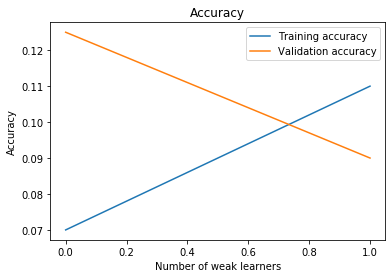

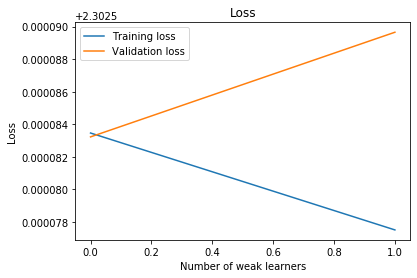

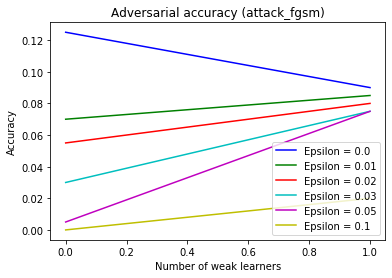

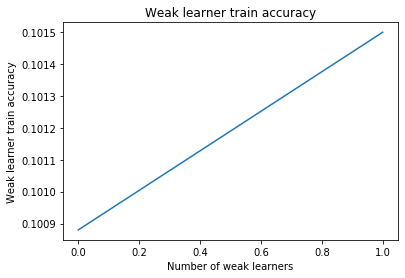

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
attack eps ens [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]
----------------------------------------------------------------------------------------------------
Training weak learner 0
adv_train: True
Epoch 0
Training accuracy of weak learner:  0.1
Alpha:  0.0


RuntimeError: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 7.94 GiB total capacity; 7.25 GiB already allocated; 28.00 MiB free; 7.34 GiB reserved in total by PyTorch)

In [9]:
for i in range(len(maxSamples_vals)):
    maxSamples = maxSamples_vals[i]
    ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.CIFAR10, weakLearnerType = WongNeuralNetCIFAR10, val_attacks = [attack_fgsm], 
                               attack_eps_nn=epsilons, attack_eps_ensemble=epsilons, train_eps_nn=8, adv_train=True)
    ensembles.append(ensemble)
    path_head = 'results/plots/cifar10/'
    acc_file = path_head + f'acc_maxSamples_{maxSamples}.png'
    adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
    loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
    wl_train_acc_file = path_head + f'wl_train_acc_maxSamples_{maxSamples}.png'
    ensemble.plot_accuracies(acc_file)
    ensemble.plot_loss(loss_file)
    ensemble.plot_adversarial_accuracies(adv_acc_file)
    ensemble.plot_wl_train_acc(wl_train_acc_file)

In [9]:
# for maxSamples in maxSamples_vals:
#         ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.CIFAR10, weakLearnerType = WongNeuralNetCIFAR10, val_attacks = [attack_fgsm], 
#                                attack_eps_nn=epsilons, attack_eps_ensemble=epsilons, train_eps_nn=8, adv_train=True)
#         ensembles.append(ensemble)

NameError: name 'WongNeuralNetMNIST' is not defined

In [ ]:
ensembles[0].plot_adversarial_accuracies()

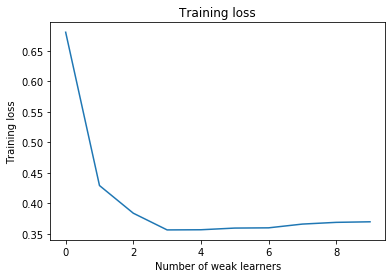

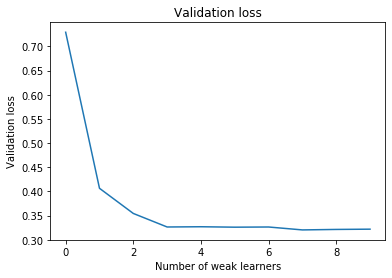

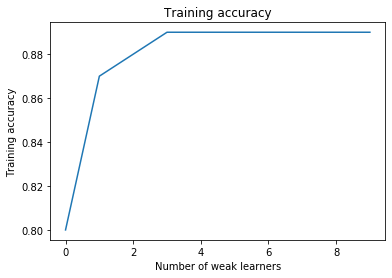

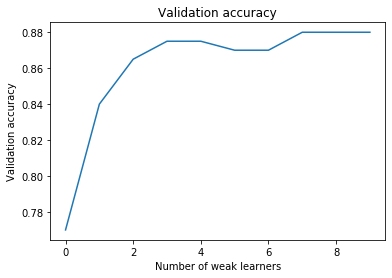

In [11]:
ensembles[0].plot_train_loss()
ensembles[0].plot_val_loss()
ensembles[0].plot_train_accuracies()
ensembles[0].plot_val_accuracies()

In [10]:
ensembles[0].attack_eps

[]